# VC_P2 Pedro Batista Sosa

#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

(512, 512)
Valor máximo de píxeles blancos por fila: 56100
Filas con un número de píxeles blancos mayor o igual que el 95% del valor máximo:
Filas: [ 12 100]
Número de píxeles blancos por fila (mayor o igual que 0.95 * maxfil): [56100 54060]


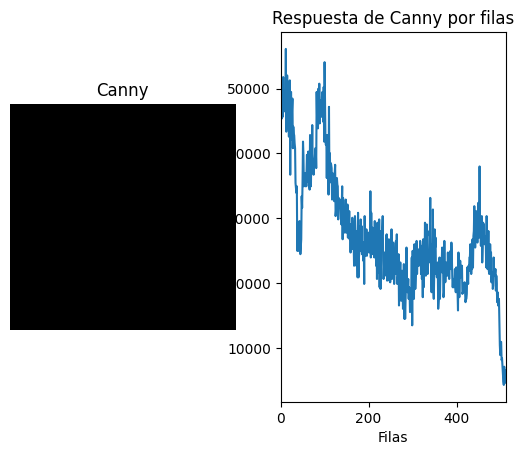

In [2]:
img = cv2.imread("mandril.jpg")
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)
print(canny.shape)

# Paso 1: Cuenta el número de píxeles blancos (255) por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1) 

# Paso 2: Encontrar el valor máximo de píxeles blancos por fila
maxfil = np.max(row_counts)

# Paso 3: Determinar el umbral del 95% de maxfil
threshold = 0.95 * maxfil

# Paso 4: Obtener las posiciones de las filas que cumplen con la condición
posiciones = np.where(row_counts >= threshold)[0]  # Devuelve los índices de las filas que cumplen la condición

# Paso 5: Muestra resultados
print(f"Valor máximo de píxeles blancos por fila: {maxfil}")
print(f"Filas con un número de píxeles blancos mayor o igual que el 95% del valor máximo:")
print(f"Filas: {posiciones}")
print(f"Número de píxeles blancos por fila (mayor o igual que 0.95 * maxfil): {row_counts[posiciones].flatten()}")

canny_maxfil = cv2.Canny(gris, threshold, maxfil)
# Paso 6: Muestra gráficamente la cuenta de píxeles blancos por fila
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny_maxfil, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny por filas")
plt.xlabel("Filas")
plt.ylabel("Número de píxeles blancos")
plt.plot(row_counts)
plt.xlim([0, canny.shape[0]])  # Ajusta el límite del eje x al número de filas
plt.show()


TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

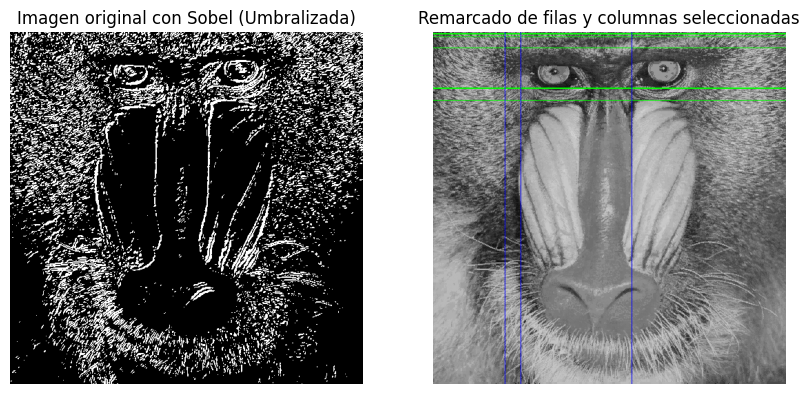

Máximo de píxeles blancos por fila: 55080
Máximo de píxeles blancos por columna: 55845
Filas con píxeles >= 0.95*max: [  3   4   8  24  82  83 100]
Columnas con píxeles >= 0.95*max: [104 127 288]


In [3]:
# Cargar la imagen original (puedes usar cualquier imagen de entrada)
img = cv2.imread('mandril.jpg', cv2.IMREAD_GRAYSCALE)
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

sobel8_v1 = cv2.convertScaleAbs(sobel)

# Aplicar umbralización (Threshold)
ret, umbral = cv2.threshold(sobel8_v1, 100, 255, cv2.THRESH_BINARY)

# Contar píxeles no nulos (blancos) por filas y columnas
filas_blancos = cv2.reduce(umbral, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
columnas_blancos = cv2.reduce(umbral, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1) 

# Calcular valor máximo de píxeles blancos por fila y columna
max_filas = np.max(filas_blancos)
max_columnas = np.max(columnas_blancos)

# Filas y columnas con más del 95% de píxeles blancos respecto al máximo
filas_seleccionadas = np.where(filas_blancos >= 0.95 * max_filas)[0]
columnas_seleccionadas = np.where(columnas_blancos[0] >= 0.95 * max_columnas)[0]

# Remarcar las filas y columnas seleccionadas en la imagen original
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convertir a BGR para dibujar en color

# Dibujar líneas en las filas seleccionadas
for fila in filas_seleccionadas:
    cv2.line(output, (0, fila), (output.shape[1], fila), (0, 255, 0), 1)

# Dibujar líneas en las columnas seleccionadas
for col in columnas_seleccionadas:
    cv2.line(output, (col, 0), (col, output.shape[0]), (0, 0, 255), 1)

# Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original con Sobel (Umbralizada)')
plt.axis("off")
plt.imshow(umbral, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Remarcado de filas y columnas seleccionadas')
plt.axis("off")
plt.imshow(output)
plt.show()

# Mostrar resultados en consola
print(f"Máximo de píxeles blancos por fila: {max_filas}")
print(f"Máximo de píxeles blancos por columna: {max_columnas}")
print(f"Filas con píxeles >= 0.95*max: {filas_seleccionadas}")
print(f"Columnas con píxeles >= 0.95*max: {columnas_seleccionadas}")

Comparación Sobel vs. Canny:
Canny es un detector de bordes más robusto, sin embargo sobel es más simple y por eso se debe hacer un proceso de suavizado. Esto se ve en los resultados, Canny muestra un resultado más limpio y solo hay dos filas que cumplen el 95% de maxfil mientras que en Sobel son más.


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.

Para cumplimentar esta tarea se utiliza sobel y la umbralización para mostrar los bordes de la cámara. 


In [5]:
# Captura de vídeo
vid = cv2.VideoCapture(0)

while True:
    # Captura fotograma
    ret, frame = vid.read()
    
    if not ret:
        break

    # Aplicar efecto espejo
    framem = cv2.flip(frame, 1)

    # Convertir a escala de grises para aplicar Sobel
    gris = cv2.cvtColor(framem, cv2.COLOR_BGR2GRAY)
    gris = cv2.GaussianBlur(gris, (3, 3), 0)
    
    # Detección de bordes con Sobel
    sobelx = cv2.Sobel(gris, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gris, cv2.CV_64F, 0, 1, ksize=5)
    sobel = cv2.add(sobelx, sobely)

    # Umbralización
    ret, umbral = cv2.threshold(gris, 100, 200, cv2.THRESH_BINARY)

    # Muestra resultados
    cv2.imshow('Imagen Original', framem)
    cv2.imshow('Bordes Sobel', sobel)
    cv2.imshow('Umbralización', umbral)

    # Salir al presionar ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
cv2.destroyAllWindows()

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

El demostrador hace aparecer círculos en los movimientos de la camara que poco a poco van desapareciendo y aumentando su coordenada y. 

In [6]:
# Captura de vídeo
vid = cv2.VideoCapture(0)

# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

# Lista para almacenar las posiciones de los círculos y su "vida"
circulos = []

# Parámetros del círculo
tiempo_de_vida = 10  # Cuadros que durarán visibles los círculos
radio = 15  # Radio de los círculos

while True:
    # Captura fotograma
    ret, frame = vid.read()
    
    if not ret:
        break

    # Aplicar efecto espejo
    framem = cv2.flip(frame, 1)

    # Aplicar el eliminador de fondo
    objetos = eliminadorFondo.apply(framem)

    # Buscar las posiciones donde hay movimiento (pixeles diferentes de cero)
    movimiento = np.where(objetos > 0)

    # Para cada pixel con movimiento, añadir un círculo (si es el caso)
    for i in range(len(movimiento[0])):
        if len(circulos) <= 250:
            cx, cy = movimiento[1][i], movimiento[0][i]
            circulos.append([cx, cy, tiempo_de_vida])

    # Dibujar los círculos en la imagen original
    for circulo in circulos:
        cx, cy, vida = circulo
        # Subir el círculo (reducir la coordenada y)
        circulo[1] -= 2  # Velocidad a la que el círculo sube
        # Reducir el tiempo de vida del círculo
        circulo[2] -= 1

        # Dibujar el círculo
        cv2.circle(framem, (cx, cy), radio, (0, 255, 0), -1)

    # Eliminar los círculos que han salido de la pantalla o cuya vida haya terminado
    circulos = [c for c in circulos if c[1] > 0 and c[2] > 0]

    # Mostrar resultados
    cv2.imshow('Rastro de Movimiento con Círculos en Movimiento', framem)

    # Salir al presionar ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
cv2.destroyAllWindows()
